# Material Handling

There are 3 groups of material in Femag: iron, magnets and conductors.

## Iron Material

Iron is used for the lamination of stator and rotor. Its properties are included in MC/MCV files. This is how MCV files can be read:

In [1]:
import femagtools.mcv

In [2]:
mcvreader = femagtools.mcv.Reader()
mcvreader.readMcv('M270-35A.MC')

In [3]:
mcvreader.get_results(

{'Bo': 1.5,
 'b_coeff': 1.850000023841858,
 'bref': 0.0,
 'bsat': 0.0,
 'ch': 0.0,
 'ch_freq': 1.0,
 'ctype': 1,
 'curve': [{'angle': 0.0,
   'bi': [0.0,
    0.10174000263214111,
    0.2011370062828064,
    0.29615598917007446,
    0.38528698682785034,
    0.4676159918308258,
    0.5427759885787964,
    0.6108270287513733,
    0.6721190214157104,
    0.7271659970283508,
    0.7765570282936096,
    1.0706720352172852,
    1.19780695438385,
    1.2671619653701782,
    1.3110430240631104,
    1.3416420221328735,
    1.3644800186157227,
    1.382403016090393,
    1.3970229625701904,
    1.4093159437179565,
    1.4805519580841064,
    1.5231300592422485,
    1.558081030845642,
    1.589516043663025,
    1.6187200546264648,
    1.646183967590332,
    1.672116994857788,
    1.6966110467910767,
    1.7197109460830688,
    1.8815209865570068,
    1.9547009468078613,
    1.9886070489883423,
    2.0083839893341064,
    2.023422956466675,
    2.0368940830230713,
    2.049838066101074,
    2.062593

Dieplay the B(H) curve in a linear plot:

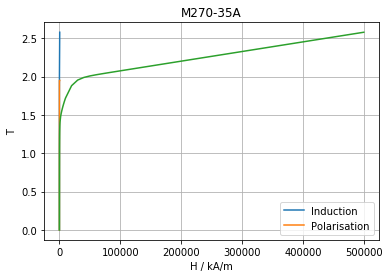

In [4]:
import matplotlib.pylab as pl

pl.plot(mcvreader['curve'][0]['hi'], mcvreader['curve'][0]['bi'])
pl.show()

or with the plot module:

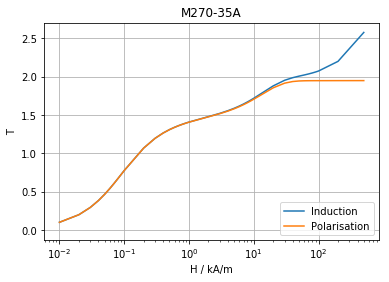

In [6]:
import femagtools.plot
femagtools.plot.mcv_hbj(mcvreader, log=True)
pl.show()

Display the relative permeability:

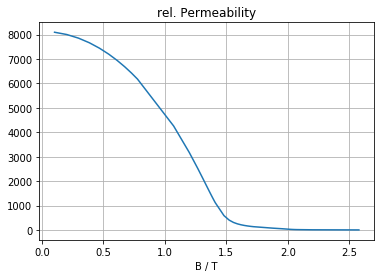

In [6]:
femagtools.plot.mcv_muer(mcvreader)
pl.show()

A new BH curve can be created from a dict:

In [7]:
mcvData = dict(curve=[ dict(
     bi=[0.0, 0.09, 0.179, 0.267, 0.358,
         0.45, 0.543, 0.6334, 0.727,
         0.819, 0.9142, 1.0142, 1.102,
         1.196, 1.314, 1.3845, 1.433,
         1.576, 1.677, 1.745, 1.787,
         1.81, 1.825, 1.836],
 
     hi=[0.0, 22.16, 31.07, 37.25, 43.174,
          49.54, 56.96, 66.11, 78.291,
          95, 120.64, 164.6, 259.36,
          565.86, 1650.26, 3631.12, 5000, 10000,
          15000, 20000, 25000, 30000, 35000, 40000]
      )],
      ctype=femagtools.mcv.MAGCRV,
      name='m270-35a',
      desc=u"Demo Steel",
      ch=0.0,
      cw_freq=2.0,
      cw=1.68)

The MCV dict must contain a list of curves. If the material is soft iron this list has exactly one dict with the 2 lists of bi and hi. 

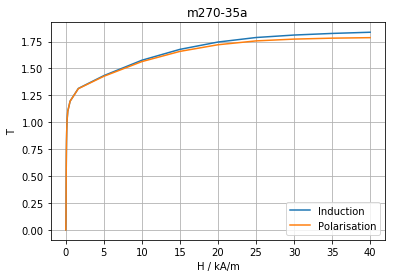

In [8]:
femagtools.plot.mcv_hbj(mcvData, log=False)
pl.show()

In [9]:
mcv = femagtools.mcv.MagnetizingCurve(mcvData)
mcv.writefile('m270-35a')

'm270-35a.MCV'

In [10]:
mcvreader.readMcv('m270-35a.MCV')

In [11]:
mcvreader['curve'][0]['bi']

[0.0,
 0.09000000357627869,
 0.17900000512599945,
 0.2669999897480011,
 0.3580000102519989,
 0.44999998807907104,
 0.5429999828338623,
 0.633400022983551,
 0.7269999980926514,
 0.8190000057220459,
 0.9142000079154968,
 1.01419997215271,
 1.1019999980926514,
 1.1959999799728394,
 1.3140000104904175,
 1.3845000267028809,
 1.4329999685287476,
 1.5759999752044678,
 1.6770000457763672,
 1.7450000047683716,
 1.7869999408721924,
 1.809999942779541,
 1.8250000476837158,
 1.8359999656677246]

Magnetic curve dicts can also be created from TKS files:

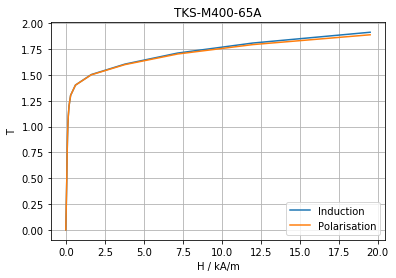

In [12]:
import femagtools.tks
tks = femagtools.tks.read('TKS-M400-65A.txt')
femagtools.plot.mcv_hbj(tks, log=False)
pl.show()

If the TKS file includes losses they are fitted with the Jordan approximation:

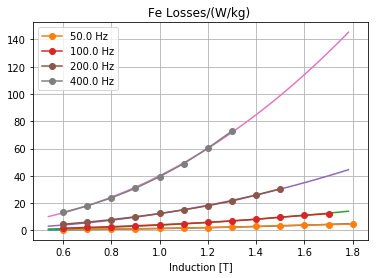

In [13]:
cw = tks['cw']
alpha = tks['cw_freq']
ch = tks['ch']
beta = tks['ch_freq']
gamma = tks['b_coeff']

femagtools.plot.felosses(tks['losses'], (cw, alpha, ch, beta, gamma), log=False)
pl.show()

## Magnet Material

Magnets can be defined by magnetzing curve or in the linear case which is used convienently by the remanence and the relative permeability: 

In [14]:
magnets = [dict(name='MX-333', remanenc=1.2, relperm=1.05)]

In cases where this not applicabble a magnetizing curve can be referenced:

In [15]:
magnets=[dict(name='BH53M', mcvkey='BH53M',
                     orient='mcartiso', rlen=1.0)]

The mcvkey can either reference a file or an entry in the magnetizing curve dict.